<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: West Nile Virus Prediction

by Gary, Hao Ming and Jun Hong

---
## Part 1: Introduction & Data Cleaning

### Contents:
- [Problem Statement](#Problem-Statement)
- [Background](#Background)
- [Data Cleaning](#Data-Cleaning)
---

## Problem Statement

We are a team of data scientists from the Disease And Treatment Agency, division of Societal Cures In Epidemiology and New Creative Engineering (DATA-SCIENCE). <br>

Due to the recent epidemic of West Nile virus WNV) in Windy City, we have been tasked by Chicago Department of Public Health to predict the occurrence of mosquitos that would test positive for WNV, based on the data collected over time. 

With a more accurate prediction model, we could help the city to make more informed decisions on the deployment of resources towards preventing transmission of the virus. Given that pesticides are costly, harmful to human health and the environement but yet essential, we will also conduct a cost-benefit analysis regarding use of pesticides to manage the epidemic.


## Background

The West Nile virus (WNV) is the leading mosquito-borne disease in the United States ([source](https://www.cdc.gov/westnile/index.html)). It is most commonly spread to humans through infected mosquitos. Around 20% of people who become infected with the virus develop symptoms ranging from a persistent fever, to serious neurological illnesses that can result in death.

In 2002, the first human cases of West Nile virus were reported in Chicago ([source](https://dph.illinois.gov/topics-services/diseases-and-conditions/west-nile-virus.html)). By 2004 the City of Chicago and the Chicago Department of Public Health (CDPH) had established a comprehensive surveillance and control program that is still in effect today ([source](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_living/news/2021/august/city-to-spray-insecticide-wednesday-to-kill-mosquitoes.html)).

Every week from late spring through the fall, mosquitos in traps across the city are tested for the virus. The results of these tests influence when and where the city will spray airborne pesticides to control adult mosquito populations.

Hot and dry weather conditions are favorable for mosquitos breeding ([source](https://www.preventivepestcontrol.com/weather-affect-mosquito-activity/)). The entire life cycle of a mosquito from an egg to an adult takes around 8-10 days ([source](https://www.cdc.gov/dengue/resources/factsheets/mosquitolifecyclefinal.pdf)). With such a short timeline, it is vital that we can predict potential clusters quickly and stop the transmission of WNV.




## Data Cleaning

In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the various datasets

spray = pd.read_csv("../assets/spray.csv")
weather = pd.read_csv("../assets/weather.csv")
train = pd.read_csv("../assets/train.csv")
test = pd.read_csv("../assets/test.csv")

### Spray

In [3]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [4]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [5]:
#Convert ["Date"] to datetime dtype
spray['Date'] = pd.to_datetime(spray['Date'])
spray['Year'] = spray['Date'].apply(lambda x: x.year)
spray['Month'] = spray['Date'].apply(lambda x: x.month)
spray['Week'] = spray['Date'].apply(lambda x: x.week)
spray['Day'] = spray['Date'].apply(lambda x: x.dayofweek)

In [6]:
spray.describe()

,Latitude,Longitude,Year,Month,Week,Day
count,14835.000000,14835.000000,14835.000000,14835.000000,14835.000000,14835.000000
mean,41.904828,-87.736690,2012.702191,7.948028,33.045231,2.699360
std,0.104381,0.067292,0.712013,0.677402,2.454612,0.517403
min,41.713925,-88.096468,2011.000000,7.000000,29.000000,0.000000
25%,41.785001,-87.794225,2013.000000,7.000000,30.000000,2.000000
50%,41.940075,-87.727853,2013.000000,8.000000,33.000000,3.000000
75%,41.980978,-87.694108,2013.000000,8.000000,35.000000,3.000000
max,42.395983,-87.586727,2013.000000,9.000000,36.000000,4.000000


In [7]:
#check for null
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
Year           0
Month          0
Week           0
Day            0
dtype: int64

In [8]:
#checking which are the dates that time is null
null = lambda spray: spray[spray.isnull().any(axis=1)]
null(spray)

,Date,Time,Latitude,Longitude,Year,Month,Week,Day
1030,2011-09-07,NaN,41.987092,-87.794286,2011,9,36,2
1031,2011-09-07,NaN,41.987620,-87.794382,2011,9,36,2
1032,2011-09-07,NaN,41.988004,-87.794574,2011,9,36,2
1033,2011-09-07,NaN,41.988292,-87.795486,2011,9,36,2
1034,2011-09-07,NaN,41.988100,-87.796014,2011,9,36,2
...,...,...,...,...,...,...,...,...
1609,2011-09-07,NaN,41.995876,-87.811615,2011,9,36,2
1610,2011-09-07,NaN,41.995972,-87.810271,2011,9,36,2
1611,2011-09-07,NaN,41.995684,-87.810319,2011,9,36,2
1612,2011-09-07,NaN,41.994724,-87.810415,2011,9,36,2


As we are more concerned on the dates of spraying carried out as compared to the timing, we will drop `Time` from our list of features. Furthermore, there are many missing values as well. 

In [9]:
spray.drop(columns='Time', inplace=True)

In [10]:
#check for duplicates
spray.duplicated().sum()

541

In [11]:
# examine the duplicated values
spray[spray.duplicated()]

,Date,Latitude,Longitude,Year,Month,Week,Day
485,2011-09-07,41.983917,-87.793088,2011,9,36,2
490,2011-09-07,41.986460,-87.794225,2011,9,36,2
491,2011-09-07,41.986460,-87.794225,2011,9,36,2
492,2011-09-07,41.986460,-87.794225,2011,9,36,2
493,2011-09-07,41.986460,-87.794225,2011,9,36,2
...,...,...,...,...,...,...,...
1025,2011-09-07,41.986460,-87.794225,2011,9,36,2
1026,2011-09-07,41.986460,-87.794225,2011,9,36,2
1027,2011-09-07,41.986460,-87.794225,2011,9,36,2
1028,2011-09-07,41.986460,-87.794225,2011,9,36,2


There are many duplicated rows with the same date, latitude and longitude.
It is likely due to a data error as we are unable to find additional information on how the data was collected. Therefore, we will drop these duplicated rows.

In [12]:
# Drop duplicates
spray.drop_duplicates(inplace=True)

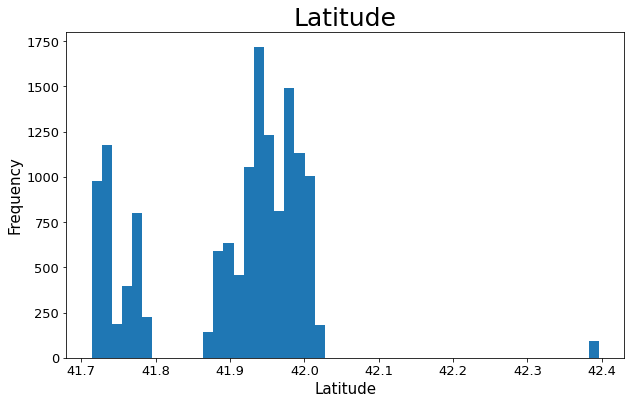

In [13]:
# Examine latitude and longitude

plt.figure(figsize=(10,6))

plt.hist(spray['Latitude'],50);

plt.xticks(fontsize=13);
plt.yticks(fontsize=13);
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Latitude", fontsize=25);

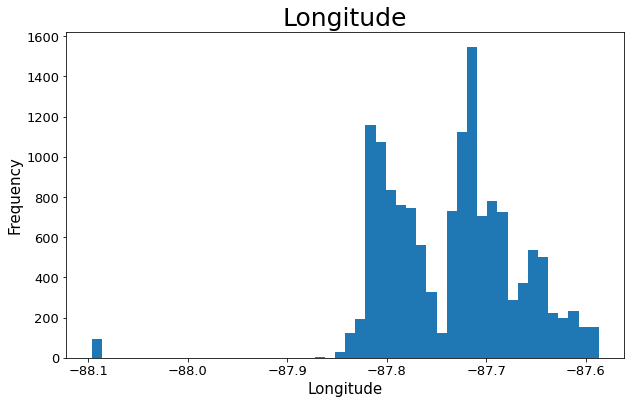

In [14]:
plt.figure(figsize=(10,6))

plt.hist(spray['Longitude'],50);

plt.xticks(fontsize=13);
plt.yticks(fontsize=13);
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Longitude", fontsize=25);

In [15]:
spray[spray['Latitude']>42.3].value_counts()

Date        Latitude   Longitude   Year  Month  Week  Day
2011-08-29  42.389460  -88.093895  2011  8      35    0      1
            42.392988  -88.094970  2011  8      35    0      1
            42.393118  -88.093737  2011  8      35    0      1
            42.393103  -88.093182  2011  8      35    0      1
            42.393093  -88.094055  2011  8      35    0      1
                                                            ..
            42.391403  -88.088003  2011  8      35    0      1
            42.391348  -88.089163  2011  8      35    0      1
            42.391297  -88.095203  2011  8      35    0      1
            42.391275  -88.095608  2011  8      35    0      1
            42.395983  -88.095757  2011  8      35    0      1
Length: 95, dtype: int64

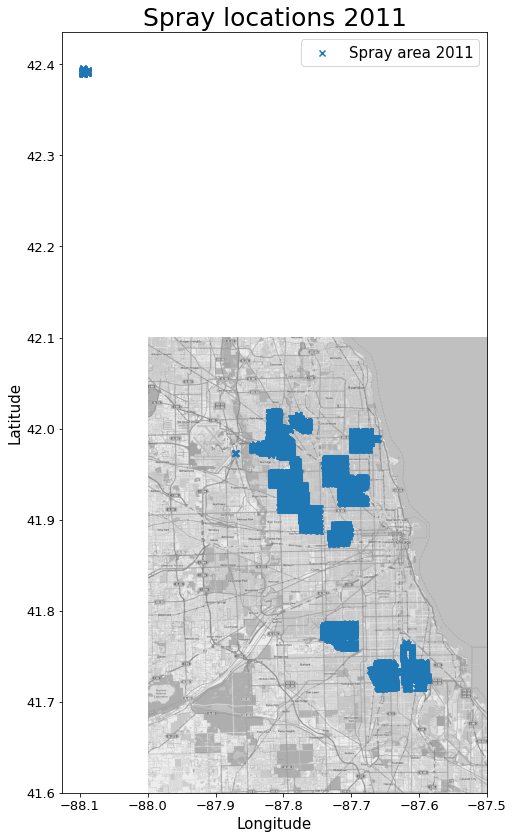

In [16]:
mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

spray_locations = spray[['Longitude', 'Latitude']].drop_duplicates().values


plt.scatter(spray_locations[:,0], spray_locations[:,1], marker='x')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Latitude", fontsize=15)
plt.title("Spray locations 2011", fontsize=25)
plt.legend(["Spray area 2011"], fontsize=15);

There seems to be some outliers from the spray coordinates. We will drop these coordinates.

In [17]:
# remove outlier spray location
out_row = spray[spray['Latitude']>42.3].index
spray.drop(out_row, axis=0, inplace=True)

In [18]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14199 entries, 95 to 14834
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14199 non-null  datetime64[ns]
 1   Latitude   14199 non-null  float64       
 2   Longitude  14199 non-null  float64       
 3   Year       14199 non-null  int64         
 4   Month      14199 non-null  int64         
 5   Week       14199 non-null  int64         
 6   Day        14199 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 887.4 KB


In [19]:
spray_cleaned = spray
spray_cleaned.to_csv('../assets/spray_cleaned.csv', index=False)

### Weather

In [20]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [21]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [22]:
weather['Date'] = pd.to_datetime(weather['Date'])
weather['Year'] = weather['Date'].apply(lambda x: x.year)
weather['Month'] = weather['Date'].apply(lambda x: x.month)
weather['Week'] = weather['Date'].apply(lambda x: x.week)
weather['Day'] = weather['Date'].apply(lambda x: x.dayofweek)

In [23]:
weather.describe()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir,Year,Month,Week,Day
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,53.457880,6.960666,17.494905,2010.500000,7.500000,30.838995,3.002038
std,0.500085,11.461970,10.381939,10.675181,3.587527,10.063609,2.291677,1.710236,7.600760,1.997789
min,1.000000,41.000000,29.000000,22.000000,0.100000,1.000000,2007.000000,5.000000,17.000000,0.000000
25%,1.000000,69.000000,50.000000,46.000000,4.300000,7.000000,2008.750000,6.000000,24.000000,1.000000
50%,1.500000,78.000000,59.000000,54.000000,6.400000,19.000000,2010.500000,7.500000,31.000000,3.000000
75%,2.000000,85.000000,66.000000,62.000000,9.200000,25.000000,2012.250000,9.000000,37.000000,5.000000
max,2.000000,104.000000,83.000000,75.000000,24.100000,36.000000,2014.000000,10.000000,44.000000,6.000000


In [24]:
#Replacing all - and empty strings to np.nan
weather = weather.replace('-',np.nan)
weather = weather.replace(' ',np.nan)

In [25]:
weather.isnull().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg              0
Depart            0
DewPoint          0
WetBulb           0
Heat              0
Cool              0
Sunrise        1472
Sunset         1472
CodeSum        1609
Depth             0
Water1            0
SnowFall          0
PrecipTotal       0
StnPressure       0
SeaLevel          0
ResultSpeed       0
ResultDir         0
AvgSpeed          0
Year              0
Month             0
Week              0
Day               0
dtype: int64

`DewPoint` and `WetBulb` temperatures are useful features and measures for humidity, therefore we will keep them.

`Heat` and `Cool` refer to heating and cooling degree days. While it is useful information for calculate energy consumption, for our analysis, we will be interpreting the temperature readings directly. Hence, we will drop these features.

We will also drop `Sunrise` and `Sunset` timings, as we are not examining the correlation with time of the day.

Lastly, `SnowFall` will also be dropped as we can interpret the temperature readings for that day. 

In [26]:
weather.drop(columns=['Heat', 'Cool',
                      'Sunrise', 'Sunset',
                      'SnowFall'], inplace=True)

In [27]:
print('Amount of rows with missing data in Depart column:',
      weather[weather['Depart'] == 'M'].shape[0])

Amount of rows with missing data in Depart column: 1472


`Depart` refers to departure from normal temperature. We will drop this feature as there are alot of missing values.

In [28]:
weather.drop(columns='Depart', inplace=True)

As there are high number of missing values in Depth and Water1 columns, we will drop these features.  

In [29]:
print('Number of missing values in Depth column:', weather[weather['Depth'] == 'M'].shape[0])
print('Number of missing values in Water1 column:', weather[weather['Water1'] == 'M'].shape[0])
weather.drop(columns=['Depth', 'Water1'], inplace=True)

Number of missing values in Depth column: 1472
Number of missing values in Water1 column: 2944


In [30]:
weather[weather['Tavg'] == "M"]["Tavg"]

7       M
505     M
675     M
1637    M
2067    M
2211    M
2501    M
2511    M
2525    M
2579    M
2811    M
Name: Tavg, dtype: object

In [31]:
# impute missing Tavg data with the average of Tmax and Tmin
weather['Tavg'].mask(weather['Tavg'] == 'M', round((weather['Tmax'] + weather['Tmin'])/2), inplace=True)

In [32]:
weather['Tavg'] = pd.to_numeric(weather['Tavg'])

In [33]:
#PrecipTotal cleaning 
#'T' has whitespace in front, must use .strip() to clean it
weather['PrecipTotal'] = weather['PrecipTotal'].map(lambda x: x.strip())

# Convert 'T' entries to 0, and convert dtype to float
weather['PrecipTotal'] = weather['PrecipTotal'].map(lambda x: x.replace('T', '0.001'))
weather['PrecipTotal'] = weather['PrecipTotal'].map(lambda x: x.replace('M', '0'))
weather['PrecipTotal'] = weather['PrecipTotal'].astype(float)

In [34]:
#Impute Values for WetBulb
weather['WetBulb'] = weather['WetBulb'].map(lambda x: x.strip())
weather[(weather['WetBulb'] == "T") | (weather['WetBulb'] =="M")]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Week,Day
848,1,2009-06-26,86,69,78.0,60,M,NaN,0.00,M,29.85,6.4,4,8.2,2009,6,26,4
2410,1,2013-08-10,81,64,73.0,57,M,NaN,0.00,M,30.08,5.3,5,6.5,2013,8,32,5
2412,1,2013-08-11,81,60,71.0,61,M,RA,0.01,29.35,30.07,2.0,27,3.0,2013,8,32,6
2415,2,2013-08-12,85,69,77.0,63,M,RA,0.66,29.27,29.92,4.5,26,7.7,2013,8,33,0


In [35]:
# Imputing 'M' observed in Station 1 with Station 2 reading
for i in [848,2410,2412]:
    weather.iloc[i,6] = weather.iloc[i+1,6]

# Imputing 'M' observed in Station 2 with Station 1 reading
for i in [2415]:
    weather.iloc[i,6] = weather.iloc[i-1,6]

In [36]:
# check changes has taken place
weather[(weather['WetBulb'] == "T") | (weather['WetBulb'] =="M")]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Week,Day


In [37]:
#Impute Values for StnPressure
weather['StnPressure'] = weather['StnPressure'].map(lambda x: x.strip())

In [38]:
weather[(weather['StnPressure'] == "T") | (weather['StnPressure'] =="M")]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Week,Day
87,2,2007-06-13,86,68,77.0,53,62,NaN,0.0,M,M,7.0,5,M,2007,6,24,2
848,1,2009-06-26,86,69,78.0,60,67,NaN,0.0,M,29.85,6.4,4,8.2,2009,6,26,4
2410,1,2013-08-10,81,64,73.0,57,63,NaN,0.0,M,30.08,5.3,5,6.5,2013,8,32,5
2411,2,2013-08-10,81,68,75.0,55,63,NaN,0.0,M,30.07,6.0,6,7.4,2013,8,32,5


In [39]:
# Imputing "M" with Station 1 reading on the same day
weather.iloc[87,9] = weather.iloc[86,9]

# Imputing "M" with previous day reading
weather.iloc[2410,9] = weather.iloc[2409,9]
weather.iloc[2411,9] = weather.iloc[2410,9]

# Imputing "M" with Station 2 reading on the same day
weather.iloc[848,9] = weather.iloc[849,9]

In [40]:
weather.iloc[87]

Station                          2
Date           2007-06-13 00:00:00
Tmax                            86
Tmin                            68
Tavg                          77.0
DewPoint                        53
WetBulb                         62
CodeSum                        NaN
PrecipTotal                    0.0
StnPressure                  29.36
SeaLevel                         M
ResultSpeed                    7.0
ResultDir                        5
AvgSpeed                         M
Year                          2007
Month                            6
Week                            24
Day                              2
Name: 87, dtype: object

In [41]:
weather[(weather['StnPressure'] == "T") | (weather['StnPressure'] =="M")]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Week,Day


In [42]:
weather['SeaLevel'] = weather['SeaLevel'].map(lambda x: x.strip())

In [43]:
weather[(weather['SeaLevel'] == "T") | (weather['SeaLevel'] =="M")]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Week,Day
87,2,2007-06-13,86,68,77.0,53,62,NaN,0.000,29.36,M,7.0,5,M,2007,6,24,2
832,1,2009-06-18,80,61,71.0,63,67,RA BR,0.120,29.08,M,6.7,16,7.9,2009,6,25,3
994,1,2009-09-07,77,59,68.0,59,62,BR,0.000,29.39,M,5.8,3,4.0,2009,9,37,0
1732,1,2011-09-08,75,57,66.0,53,59,RA,0.001,29.34,M,13.0,2,13.4,2011,9,36,3
1745,2,2011-09-14,60,48,54.0,45,51,RA BR HZ FU,0.001,29.47,M,6.0,32,M,2011,9,37,2
1756,1,2011-09-20,74,49,62.0,54,58,MIFG BCFG BR,0.000,29.26,M,7.3,18,7.3,2011,9,38,1
2067,2,2012-08-22,84,72,78.0,51,61,NaN,0.000,29.39,M,4.7,19,M,2012,8,34,2
2090,1,2012-09-03,88,71,80.0,70,73,BR,0.000,29.17,M,4.6,6,4.4,2012,9,36,0
2743,2,2014-07-23,76,64,70.0,56,61,NaN,0.000,29.47,M,16.4,2,16.7,2014,7,30,2


In [44]:
# Imputing 'M' observed in Station 2 with Station 1 reading
for i in [87,1745,2067,2743]:
    weather.iloc[i,10] = weather.iloc[i-1,10]

In [45]:
# Imputing 'M' observed in Station 1 with Station 2 reading
for i in [832,994,1732,1756,2090]:
    weather.iloc[i,10] = weather.iloc[i+1,10]

In [46]:
weather[(weather['SeaLevel'] == "T") | (weather['SeaLevel'] =="M")]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Week,Day


In [47]:
#Impute Values for AvgSpeed
weather['AvgSpeed'] = weather['AvgSpeed'].map(lambda x: x.strip())

In [48]:
weather[(weather['AvgSpeed'] == "T") | (weather['AvgSpeed'] =="M")]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Week,Day
87,2,2007-06-13,86,68,77.0,53,62,NaN,0.000,29.36,30.09,7.0,5,M,2007,6,24,2
1745,2,2011-09-14,60,48,54.0,45,51,RA BR HZ FU,0.001,29.47,30.09,6.0,32,M,2011,9,37,2
2067,2,2012-08-22,84,72,78.0,51,61,NaN,0.000,29.39,30.07,4.7,19,M,2012,8,34,2


In [49]:
# Imputing 'M' observed in Station 2 with Station 1 reading
for i in [87,1745,2067]:
    weather.iloc[i,13] = weather.iloc[i-1,13]

In [50]:
weather[(weather['AvgSpeed'] == "T") | (weather['AvgSpeed'] =="M")]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Week,Day


In [51]:
weather['CodeSum'].value_counts().head()

RA            296
RA BR         238
BR            110
TSRA RA BR     92
BR HZ          81
Name: CodeSum, dtype: int64

In [52]:
weather['CodeSum'].isnull().sum()

1609

In [53]:
# Dropping the CodeSum column as more than 50% null values.
# The remaining string information might not be useful and could be inferred from other weather datas, e.g. temperature, precipitation. 

weather.drop(columns = ['CodeSum'], axis = 1, inplace = True)

In [54]:
# change dtype for Wetbulb, StnPressure, Sealevel, AvgSpeed to numeric to facilitate processing later

weather['WetBulb'] = pd.to_numeric(weather['WetBulb'])
weather['StnPressure'] = pd.to_numeric(weather['StnPressure'])
weather['SeaLevel'] = pd.to_numeric(weather['SeaLevel'])
weather['AvgSpeed'] = pd.to_numeric(weather['AvgSpeed'])

In [55]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   float64       
 5   DewPoint     2944 non-null   int64         
 6   WetBulb      2944 non-null   int64         
 7   PrecipTotal  2944 non-null   float64       
 8   StnPressure  2944 non-null   float64       
 9   SeaLevel     2944 non-null   float64       
 10  ResultSpeed  2944 non-null   float64       
 11  ResultDir    2944 non-null   int64         
 12  AvgSpeed     2944 non-null   float64       
 13  Year         2944 non-null   int64         
 14  Month        2944 non-null   int64         
 15  Week         2944 non-null   int64         
 16  Day   

Relative humidity is the ratio of the amount of water vapor actually present in the air to the greatest amount possible at the same temperature. This measurement could help us to better understand the weather condition.

In [56]:
def relative_humidity(tavg,dewpoint):
    # Formula to convert temperature from Farenheit to celsius : Tc=5.0/9.0x(Tf-32.0)
    # Formula to convert dewpoint from Farenheit to celsius : Tdc=5.0/9.0x(Tdf-32.0)
    tavg_celcius = (5.0/9.0)*(tavg-32.0)
    dewpoint_celcius = (5.0/9.0)*(dewpoint-32.0)
    # and 6.11x10.0x(7.5xTdc/(237.7+Tdc)) for saturated vapor pressure.
    saturation_vapour_pressure = 6.11*10.0*(7.5*tavg_celcius/(237.7+tavg_celcius))
     # 6.11x10.0x(7.5xTc/(237.7+Tc)) for actual vapor pressure
    actual_pressure = 6.11*10.0*(7.5*dewpoint_celcius/(237.7+dewpoint_celcius))
    # relative humidity = (actual_pressure/saturation_vapour_pressure)*100)
    return round(((actual_pressure/saturation_vapour_pressure)*100))

In [57]:
weather['relative_humidity'] = relative_humidity(weather['Tavg'],weather['DewPoint']).astype(int)

Computing the temperature range to account for the changes in temperature throughout the day.

In [58]:
weather['Trange'] = weather['Tmax'] - weather['Tmin']

In [59]:
# replace station 1 values with average values of station 1 and 2
for i in range(2,13):
    for r in range(0,2944,2):  
        weather.iloc[r,i] = (weather.iloc[r,i]+weather.iloc[r+1,i])/2

In [60]:
# We are only going to use the average reading of station 1 and station 2
# drop ['Station'] column
weather = weather[weather['Station'] == 1]
weather.drop(columns = ['Station'], axis =1, inplace = True)

Since we are working to reduce mosquito breeding in the city, we will also take into consideration the life cycle of a mosquito, and examine the weather conditions when the eggs are hatched and/or larvae are developing. Therefore, we will create 7 and 14-day rolling weather features of the date.  

In [61]:
# defining rollers

rollers = [i for i in weather.columns if i!='Date' and
           i!='Year' and i!='Month' and i!='Week' and i!='Day']

In [62]:
rollers

['Tmax',
 'Tmin',
 'Tavg',
 'DewPoint',
 'WetBulb',
 'PrecipTotal',
 'StnPressure',
 'SeaLevel',
 'ResultSpeed',
 'ResultDir',
 'AvgSpeed',
 'relative_humidity',
 'Trange']

In [63]:
# function to roll columns

def roller(df, col, no_days):
    name = col + "_" + str(no_days)
    df[[name]] = df[[col]].rolling(no_days).mean()

In [64]:
# selecting number of days to roll

num_days = [7, 14]

for num in num_days:
    for i in rollers:
        roller(weather, i, num)

In [65]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 2942
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1472 non-null   datetime64[ns]
 1   Tmax                  1472 non-null   float64       
 2   Tmin                  1472 non-null   float64       
 3   Tavg                  1472 non-null   float64       
 4   DewPoint              1472 non-null   float64       
 5   WetBulb               1472 non-null   float64       
 6   PrecipTotal           1472 non-null   float64       
 7   StnPressure           1472 non-null   float64       
 8   SeaLevel              1472 non-null   float64       
 9   ResultSpeed           1472 non-null   float64       
 10  ResultDir             1472 non-null   float64       
 11  AvgSpeed              1472 non-null   float64       
 12  Year                  1472 non-null   int64         
 13  Month             

In [66]:
weather.isnull().sum()

Date                     0
Tmax                     0
Tmin                     0
Tavg                     0
DewPoint                 0
WetBulb                  0
PrecipTotal              0
StnPressure              0
SeaLevel                 0
ResultSpeed              0
ResultDir                0
AvgSpeed                 0
Year                     0
Month                    0
Week                     0
Day                      0
relative_humidity        0
Trange                   0
Tmax_7                   6
Tmin_7                   6
Tavg_7                   6
DewPoint_7               6
WetBulb_7                6
PrecipTotal_7            6
StnPressure_7            6
SeaLevel_7               6
ResultSpeed_7            6
ResultDir_7              6
AvgSpeed_7               6
relative_humidity_7      6
Trange_7                 6
Tmax_14                 13
Tmin_14                 13
Tavg_14                 13
DewPoint_14             13
WetBulb_14              13
PrecipTotal_14          13
S

Due to the rolling features created, there are null rows created as well. We will remove these records. 

In [67]:
# Drop null rows
weather.dropna(inplace=True)

In [68]:
weather_cleaned = weather
weather_cleaned.to_csv("../assets/weather_cleaned.csv", index=False)

### Train

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [70]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [71]:
train.shape

(10506, 12)

In [72]:
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [73]:
train.duplicated().sum()

813

In [74]:
train[train.duplicated()].head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
295,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
351,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
353,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
512,2007-07-18,"3300 West Randolph Street, Chicago, IL 60612, USA",CULEX RESTUANS,33,E RANDOLPH ST,T044,"3300 E RANDOLPH ST, Chicago, IL",41.883284,-87.705085,8,1,0


When the number of mosquitos exceed 50 per trap, a new record/row will be created. We will combine the rows having same date, species, trap and location.

In [75]:
# Combining "NumMosquitos" for rows with same Date, Species, Trap, Lat and Long

col_names = ['Date', 'Species', 'Trap', 'Latitude','Longitude']
duplicate = train.duplicated(subset= col_names, keep = False)
train[duplicate].head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
98,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
280,2007-07-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
281,2007-07-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,2,0
293,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0


In [76]:
train = train.groupby(by=col_names).sum().reset_index()
train['NumMosquitos'].sort_values(ascending=False)

1450    2532
564     2356
1897    2207
1190    1658
2032    1648
        ... 
3180       1
3184       1
3189       1
3190       1
0          1
Name: NumMosquitos, Length: 8475, dtype: int64

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             8475 non-null   object 
 1   Species          8475 non-null   object 
 2   Trap             8475 non-null   object 
 3   Latitude         8475 non-null   float64
 4   Longitude        8475 non-null   float64
 5   Block            8475 non-null   int64  
 6   AddressAccuracy  8475 non-null   int64  
 7   NumMosquitos     8475 non-null   int64  
 8   WnvPresent       8475 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 596.0+ KB


In [78]:
train.describe()

,Latitude,Longitude,Block,AddressAccuracy,NumMosquitos,WnvPresent
count,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000
mean,41.844618,-87.694788,44.240236,9.693451,15.933805,0.065015
std,0.106609,0.084063,35.382460,10.183852,75.084707,0.337489
min,41.644612,-87.930995,10.000000,3.000000,1.000000,0.000000
25%,41.750498,-87.752329,17.000000,8.000000,2.000000,0.000000
50%,41.857402,-87.694991,39.000000,8.000000,4.000000,0.000000
75%,41.944869,-87.642984,61.000000,9.000000,11.000000,0.000000
max,42.017430,-87.531635,612.000000,306.000000,2532.000000,10.000000


We will need to remap WnvPresent as it should be a binary label: 1 for WNV present, 0 for WNV not present

In [79]:
# Remap WnvPresent to binary labels: 1 for WNV present, 0 for not present
train['WnvPresent'] = train['WnvPresent'].map(lambda x: 1 if x > 0 else 0)

In [80]:
train['WnvPresent'].value_counts()

0    8018
1     457
Name: WnvPresent, dtype: int64

Apart from Address, Street and AddressNumberAndStreet that was removed during merging of row, we will also remove other address features - Block and AddressAccuracy

In [81]:
train.drop(columns = ['Block', 'AddressAccuracy'], inplace = True)

In [82]:
# Convert "Date" column to datetime Dtype for merging of DataFrame
train["Date"] = pd.to_datetime(train["Date"])

In [83]:
# merging the cleaned train.csv with cleaned weather.csv
df_train = train.merge(weather_cleaned, how = 'left', on = 'Date')

In [84]:
df_train.isnull().sum()

Date                    0
Species                 0
Trap                    0
Latitude                0
Longitude               0
NumMosquitos            0
WnvPresent              0
Tmax                    0
Tmin                    0
Tavg                    0
DewPoint                0
WetBulb                 0
PrecipTotal             0
StnPressure             0
SeaLevel                0
ResultSpeed             0
ResultDir               0
AvgSpeed                0
Year                    0
Month                   0
Week                    0
Day                     0
relative_humidity       0
Trange                  0
Tmax_7                  0
Tmin_7                  0
Tavg_7                  0
DewPoint_7              0
WetBulb_7               0
PrecipTotal_7           0
StnPressure_7           0
SeaLevel_7              0
ResultSpeed_7           0
ResultDir_7             0
AvgSpeed_7              0
relative_humidity_7     0
Trange_7                0
Tmax_14                 0
Tmin_14     

In [85]:
#Export cleaned train dataset
df_train.to_csv('../assets/df_train.csv', index = False)

### Test

In [86]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


In [87]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


The test dataset does not have NumMosquitos and WnvPresent (predictor).

In [88]:
test.isnull().sum()

Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64

In [89]:
test.duplicated().sum()

0

In [90]:
# Drop address related features
test.drop(columns = ['Address', 'Street', 'AddressNumberAndStreet', 'Block', 'AddressAccuracy'], inplace = True)

In [91]:
# Convert "Date" column to datetime Dtype for merging of DataFrame
test["Date"] = pd.to_datetime(test["Date"])

In [92]:
# merging the test.csv with cleaned weather.csv
df_test = test.merge(weather_cleaned, how = 'left', on = 'Date')

In [93]:
#Export cleaned train dataset
df_test.to_csv('../assets/df_test.csv', index = False)